In [1]:
import os
import shutil

import numpy as np
import tensorflow as tf

2023-03-18 14:00:21.946291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 14:00:22.110407: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
import tensorflow as tf
import random
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  2


In [1]:
import os
os.getcwd()

'/home/yang'

In [2]:
os.chdir('Val')
os.getcwd()

'/home/yang/Val'

In [3]:
!find . -name ".ipynb_checkpoints" -print -delete
!find . -name ".DS_Store" -print -delete

./.ipynb_checkpoints


In [6]:
import cv2

# Load video
video_path = "videos/10698.mp4"
cap = cv2.VideoCapture(video_path)

# Get total number of frames
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get shape of each frame
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Print results
print("Total number of frames:", num_frames)
print("Frame shape:", (frame_width, frame_height))


Total number of frames: 223
Frame shape: (640, 480)


In [7]:
import os

folder_path = 'videos'  # set the path to the videos folder

count = 0
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.mp4') or file.endswith('.avi') or file.endswith('.mov'):
            count += 1

print(f"Total number of video files under '{folder_path}' folder: {count}")


Total number of video files under 'videos' folder: 4657


In [10]:
import os
import cv2
import random
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

VIDEO_PATH = "videos"
FRAME_PATH = "frames"

def extract_frames(video_file):
    # Open Video File
    video_capture = cv2.VideoCapture(os.path.join(VIDEO_PATH, video_file))

    # Calculate total frames in video
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    # Choose 32 random frames to extract
    index_arr = [i for i in range(total_frames)]
    index_arr = sorted(random.sample(index_arr, k=32))

    frame_count = 0
    for frame_index in range(total_frames):
        ret, frame = video_capture.read()

        if ret:
            # Save frame only if its index is in index_arr
            if frame_index in index_arr:
                img_number = str(frame_count).zfill(5)
                name = os.path.join(FRAME_PATH, f"{video_file.split('.')[0]}_frame_{img_number}.jpg")
                cv2.imwrite(name, frame)
                frame_count += 1

                # Remove the index from index_arr so that each index is used only once
                index_arr.remove(frame_index)

                # Exit loop after all required frames have been saved
                if frame_count == 32:
                    break
        else:
            break

    video_capture.release()

# Iterate over video files
video_files = os.listdir(VIDEO_PATH)
with ThreadPoolExecutor() as executor:
    futures = []
    for video_file in video_files:
        futures.append(executor.submit(extract_frames, video_file))
    for future in tqdm(futures):
        future.result()






100%|██████████| 4657/4657 [03:39<00:00, 21.24it/s]


In [8]:
import os
import cv2

FRAME_PATH = "frames"

# count number of image files in frames directory
total_frames = 0
for file_name in os.listdir(FRAME_PATH):
    if file_name.endswith(".jpg"):
        total_frames += 1

print(f"Total frames: {total_frames}")

# 4657*32 = 149024

Total frames: 149024


In [9]:
import os

FRAME_PATH = "frames"

# create a dictionary to store the number of frames for each video file
video_frames = {}

# iterate over all files in the frames directory
for file_name in os.listdir(FRAME_PATH):
    if file_name.endswith(".jpg"):
        # extract the video file name from the image file name
        video_file = file_name.split("_frame_")[0] + ".mp4"
        # increment the frame count for the video file
        if video_file in video_frames:
            video_frames[video_file] += 1
        else:
            video_frames[video_file] = 1

# check which video files have fewer than 32 frames
for video_file, frame_count in video_frames.items():
    if frame_count < 32:
        print(f"Video file {video_file} has only {frame_count} frames.")
    elif frame_count > 32:
        print(f"Video file {video_file} has more than 32 frames.")



2023-03-18 14:01:22.541224: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14763 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:1b:00.0, compute capability: 7.5
2023-03-18 14:01:22.542188: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14763 MB memory:  -> device: 1, name: Quadro RTX 5000, pci bus id: 0000:1c:00.0, compute capability: 7.5
2023-03-18 14:01:26.956708: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401


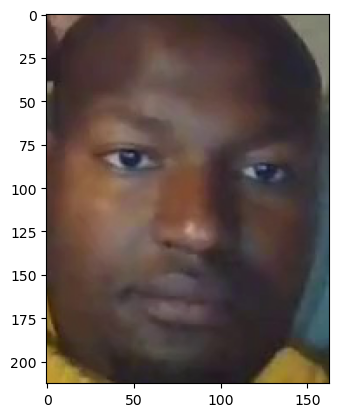

In [10]:
from retinaface import RetinaFace
from PIL import Image
import matplotlib.pyplot as plt
# Load RetinaFace detector

# Load the original image
img_path = "frames/10698_frame_00000.jpg"
img = Image.open(img_path)

# Extract the face from the image using RetinaFace
faces = RetinaFace.extract_faces(img_path=img_path, align=False)

# Display the extracted face
if faces:
    face_img = Image.fromarray(faces[0])
    plt.imshow(face_img)
else:
    print("No face detected in the image.")

# Load the image

In [15]:
faces[0].shape

(213, 163, 3)

In [20]:
# Get list of all frame paths
frame_paths = sorted([os.path.join("frames", filename) for filename in os.listdir("frames")])
print(frame_paths[0:32])

['frames/10698_frame_00000.jpg', 'frames/10698_frame_00001.jpg', 'frames/10698_frame_00002.jpg', 'frames/10698_frame_00003.jpg', 'frames/10698_frame_00004.jpg', 'frames/10698_frame_00005.jpg', 'frames/10698_frame_00006.jpg', 'frames/10698_frame_00007.jpg', 'frames/10698_frame_00008.jpg', 'frames/10698_frame_00009.jpg', 'frames/10698_frame_00010.jpg', 'frames/10698_frame_00011.jpg', 'frames/10698_frame_00012.jpg', 'frames/10698_frame_00013.jpg', 'frames/10698_frame_00014.jpg', 'frames/10698_frame_00015.jpg', 'frames/10698_frame_00016.jpg', 'frames/10698_frame_00017.jpg', 'frames/10698_frame_00018.jpg', 'frames/10698_frame_00019.jpg', 'frames/10698_frame_00020.jpg', 'frames/10698_frame_00021.jpg', 'frames/10698_frame_00022.jpg', 'frames/10698_frame_00023.jpg', 'frames/10698_frame_00024.jpg', 'frames/10698_frame_00025.jpg', 'frames/10698_frame_00026.jpg', 'frames/10698_frame_00027.jpg', 'frames/10698_frame_00028.jpg', 'frames/10698_frame_00029.jpg', 'frames/10698_frame_00030.jpg', 'frames

In [21]:
frame_groups = [frame_paths[i:i+32] for i in range(0, len(frame_paths), 32)]
print(frame_groups[:2])


[['frames/10698_frame_00000.jpg', 'frames/10698_frame_00001.jpg', 'frames/10698_frame_00002.jpg', 'frames/10698_frame_00003.jpg', 'frames/10698_frame_00004.jpg', 'frames/10698_frame_00005.jpg', 'frames/10698_frame_00006.jpg', 'frames/10698_frame_00007.jpg', 'frames/10698_frame_00008.jpg', 'frames/10698_frame_00009.jpg', 'frames/10698_frame_00010.jpg', 'frames/10698_frame_00011.jpg', 'frames/10698_frame_00012.jpg', 'frames/10698_frame_00013.jpg', 'frames/10698_frame_00014.jpg', 'frames/10698_frame_00015.jpg', 'frames/10698_frame_00016.jpg', 'frames/10698_frame_00017.jpg', 'frames/10698_frame_00018.jpg', 'frames/10698_frame_00019.jpg', 'frames/10698_frame_00020.jpg', 'frames/10698_frame_00021.jpg', 'frames/10698_frame_00022.jpg', 'frames/10698_frame_00023.jpg', 'frames/10698_frame_00024.jpg', 'frames/10698_frame_00025.jpg', 'frames/10698_frame_00026.jpg', 'frames/10698_frame_00027.jpg', 'frames/10698_frame_00028.jpg', 'frames/10698_frame_00029.jpg', 'frames/10698_frame_00030.jpg', 'frame

In [13]:
from retinaface import RetinaFace
from PIL import Image
import os
import gc
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
# Define function to extract face from frame
def extract_face(frame_path, face_locations, no_face_files):
    # Load the original image
    img = Image.open(frame_path)

    # Extract the face from the image using RetinaFace
    faces = RetinaFace.extract_faces(img_path=frame_path, align=False)

    # If no face detected, add the frame to the list of frames without a face
    if not faces:
        print(f"No face detected in frame: {frame_path}")
        no_face_files.append(frame_path)

        # If this is the first frame in the group, store the location of the previous face
        if not face_locations:
            print(f"No face detected in the first frame of the group: {frame_path}")
            return None
        else:
            facial_area = face_locations[0]
    else:
        # If face detected, save the extracted face and update the facial area
        face_img = Image.fromarray(faces[0])
        save_path = f"crop_frames/{os.path.basename(frame_path)}"
        face_img.save(save_path)
        facial_area = RetinaFace.detect_faces(img_path=frame_path)['face_1']['facial_area']
        face_locations.insert(0, facial_area)


    return facial_area

# Define function to extract faces from all frames in a group
def extract_faces_from_group(group):
    # Keep track of the facial area in the first frame
    face_locations = []

    # Keep track of frames without a face
    no_face_files = []

    # Extract faces from each frame in the group
    for frame_path in group:
        facial_area = extract_face(frame_path, face_locations, no_face_files)


    for file_path in no_face_files:
        img = Image.open(file_path)
        cropped_img = img.crop((face_locations[0][0], face_locations[0][1], face_locations[0][2], face_locations[0][3]))
        cropped_img.save(f"crop_frames/{os.path.basename(file_path)}")
        print(f"{file_path} has been cropped")
        img.close()
        cropped_img.close()

    # Release memory
    gc.collect()

    # Clean the face_locations and no_face_files lists before processing the next group
    face_locations.clear()
    no_face_files.clear()

    return None

# Define function to extract faces from all frames
def extract_faces(frame_groups):
    # Create directory to store output images if it does not exist
    if not os.path.exists("crop_frames"):
        os.mkdir("crop_frames")

    # Extract faces from each group of frames
    with ThreadPoolExecutor() as executor:
        extract_func = extract_faces_from_group
        futures = []
        for group in frame_groups:
            future = executor.submit(extract_func, group)
            futures.append(future)
            
        for future in tqdm(futures):
            result = future.result()

    return None


In [ ]:
extract_faces(frame_groups)
print("Done!")

  0%|          | 0/4657 [00:00<?, ?it/s]

No face detected in frame: frames/10834_frame_00016.jpg
No face detected in frame: frames/10834_frame_00018.jpg
No face detected in frame: frames/10834_frame_00019.jpg
No face detected in frame: frames/10834_frame_00020.jpg
No face detected in frame: frames/10834_frame_00021.jpg
No face detected in frame: frames/10834_frame_00022.jpg
No face detected in frame: frames/10834_frame_00025.jpg
No face detected in frame: frames/10834_frame_00028.jpg
No face detected in frame: frames/10834_frame_00030.jpg
No face detected in frame: frames/10834_frame_00031.jpg
frames/10834_frame_00016.jpg has been cropped
frames/10834_frame_00018.jpg has been cropped
frames/10834_frame_00019.jpg has been cropped
frames/10834_frame_00020.jpg has been cropped
frames/10834_frame_00021.jpg has been cropped
frames/10834_frame_00022.jpg has been cropped
frames/10834_frame_00025.jpg has been cropped
frames/10834_frame_00028.jpg has been cropped
frames/10834_frame_00030.jpg has been cropped
frames/10834_frame_00031.j

  0%|          | 19/4657 [02:10<3:53:10,  3.02s/it]  

No face detected in frame: frames/11111_frame_00005.jpg


  1%|          | 33/4657 [03:52<6:59:41,  5.45s/it]

No face detected in frame: frames/11030_frame_00029.jpg
frames/11030_frame_00029.jpg has been cropped


  1%|          | 35/4657 [04:13<7:29:10,  5.83s/it]

frames/11111_frame_00005.jpg has been cropped


  3%|▎         | 131/4657 [10:37<13:30:53, 10.75s/it]

No face detected in frame: frames/11526_frame_00031.jpg
frames/11526_frame_00031.jpg has been cropped


  3%|▎         | 149/4657 [10:45<1:34:40,  1.26s/it] 

No face detected in frame: frames/11957_frame_00000.jpg
No face detected in the first frame of the group: frames/11957_frame_00000.jpg


  4%|▎         | 172/4657 [12:50<3:53:40,  3.13s/it] 

frames/11957_frame_00000.jpg has been cropped


  4%|▍         | 192/4657 [12:57<51:29,  1.45it/s]  

No face detected in frame: frames/12192_frame_00023.jpg
No face detected in frame: frames/12192_frame_00024.jpg
No face detected in frame: frames/12192_frame_00025.jpg
No face detected in frame: frames/12192_frame_00026.jpg
No face detected in frame: frames/12192_frame_00027.jpg
No face detected in frame: frames/12192_frame_00028.jpg
No face detected in frame: frames/12192_frame_00029.jpg


  4%|▍         | 193/4657 [14:37<17:51:47, 14.41s/it]

No face detected in frame: frames/12192_frame_00030.jpg
No face detected in frame: frames/12192_frame_00031.jpg
frames/12192_frame_00023.jpg has been cropped
frames/12192_frame_00024.jpg has been cropped
frames/12192_frame_00025.jpg has been cropped
frames/12192_frame_00026.jpg has been cropped
frames/12192_frame_00027.jpg has been cropped
frames/12192_frame_00028.jpg has been cropped
frames/12192_frame_00029.jpg has been cropped
frames/12192_frame_00030.jpg has been cropped
frames/12192_frame_00031.jpg has been cropped


  5%|▍         | 224/4657 [15:06<51:05,  1.45it/s]   

No face detected in frame: frames/12216_frame_00014.jpg
No face detected in frame: frames/12216_frame_00015.jpg
No face detected in frame: frames/12216_frame_00016.jpg
No face detected in frame: frames/12216_frame_00018.jpg
No face detected in frame: frames/12282_frame_00025.jpg
frames/12216_frame_00014.jpg has been cropped
frames/12216_frame_00015.jpg has been cropped
frames/12216_frame_00016.jpg has been cropped
frames/12216_frame_00018.jpg has been cropped


  5%|▍         | 225/4657 [16:40<14:38:03, 11.89s/it]

No face detected in frame: frames/12282_frame_00026.jpg
No face detected in frame: frames/12282_frame_00028.jpg
No face detected in frame: frames/12282_frame_00029.jpg


  5%|▍         | 226/4657 [16:49<14:13:40, 11.56s/it]

No face detected in frame: frames/12282_frame_00030.jpg
No face detected in frame: frames/12282_frame_00031.jpg
frames/12282_frame_00025.jpg has been cropped
frames/12282_frame_00026.jpg has been cropped
frames/12282_frame_00028.jpg has been cropped
frames/12282_frame_00029.jpg has been cropped
frames/12282_frame_00030.jpg has been cropped
frames/12282_frame_00031.jpg has been cropped


  5%|▌         | 255/4657 [17:15<41:40,  1.76it/s]   

No face detected in frame: frames/12612_frame_00021.jpg
No face detected in frame: frames/12612_frame_00022.jpg
No face detected in frame: frames/12612_frame_00023.jpg
No face detected in frame: frames/12612_frame_00024.jpg
No face detected in frame: frames/12612_frame_00025.jpg
No face detected in frame: frames/12612_frame_00026.jpg
No face detected in frame: frames/12612_frame_00027.jpg
No face detected in frame: frames/12612_frame_00028.jpg


  6%|▌         | 257/4657 [18:49<12:26:13, 10.18s/it]

No face detected in frame: frames/12612_frame_00030.jpg


  6%|▌         | 258/4657 [18:56<12:01:08,  9.84s/it]

frames/12612_frame_00021.jpg has been cropped
frames/12612_frame_00022.jpg has been cropped
frames/12612_frame_00023.jpg has been cropped
frames/12612_frame_00024.jpg has been cropped
frames/12612_frame_00025.jpg has been cropped
frames/12612_frame_00026.jpg has been cropped
frames/12612_frame_00027.jpg has been cropped
frames/12612_frame_00028.jpg has been cropped
frames/12612_frame_00030.jpg has been cropped


  6%|▌         | 260/4657 [19:08<10:31:54,  8.62s/it]

No face detected in frame: frames/12504_frame_00031.jpg
frames/12504_frame_00031.jpg has been cropped


  6%|▌         | 288/4657 [19:26<1:05:37,  1.11it/s] 

No face detected in frame: frames/12761_frame_00010.jpg
No face detected in frame: frames/12761_frame_00011.jpg
No face detected in frame: frames/12695_frame_00011.jpg
No face detected in frame: frames/12761_frame_00012.jpg
No face detected in frame: frames/12695_frame_00012.jpg
No face detected in frame: frames/12761_frame_00013.jpg
No face detected in frame: frames/12695_frame_00013.jpg
No face detected in frame: frames/12695_frame_00014.jpg
No face detected in frame: frames/12695_frame_00015.jpg
No face detected in frame: frames/12695_frame_00016.jpg
No face detected in frame: frames/12695_frame_00017.jpg
No face detected in frame: frames/12695_frame_00018.jpg
No face detected in frame: frames/12695_frame_00019.jpg
No face detected in frame: frames/12695_frame_00020.jpg
No face detected in frame: frames/12695_frame_00021.jpg
No face detected in frame: frames/12695_frame_00022.jpg
No face detected in frame: frames/12695_frame_00023.jpg
No face detected in frame: frames/12695_frame_00

  6%|▋         | 292/4657 [21:14<12:14:24, 10.09s/it]

No face detected in frame: frames/12723_frame_00029.jpg
frames/12761_frame_00010.jpg has been cropped
frames/12761_frame_00011.jpg has been cropped
frames/12761_frame_00012.jpg has been cropped
frames/12761_frame_00013.jpg has been cropped


  6%|▋         | 294/4657 [21:17<7:31:18,  6.21s/it] 

No face detected in frame: frames/12723_frame_00030.jpg


  6%|▋         | 295/4657 [21:19<6:20:39,  5.24s/it]

No face detected in frame: frames/12723_frame_00031.jpg
frames/12723_frame_00029.jpg has been cropped
No face detected in frame: frames/12893_frame_00001.jpg
frames/12723_frame_00030.jpg has been cropped
frames/12723_frame_00031.jpg has been cropped


  7%|▋         | 303/4657 [21:27<1:40:32,  1.39s/it]

No face detected in frame: frames/12893_frame_00003.jpg


  7%|▋         | 304/4657 [21:28<1:41:44,  1.40s/it]

No face detected in frame: frames/12893_frame_00004.jpg


  7%|▋         | 312/4657 [21:31<45:45,  1.58it/s]  

No face detected in frame: frames/12893_frame_00005.jpg


  7%|▋         | 320/4657 [21:35<39:38,  1.82it/s]

No face detected in frame: frames/12893_frame_00006.jpg
No face detected in frame: frames/13042_frame_00000.jpg
No face detected in the first frame of the group: frames/13042_frame_00000.jpg
No face detected in frame: frames/12893_frame_00007.jpg
No face detected in frame: frames/13042_frame_00001.jpg
No face detected in the first frame of the group: frames/13042_frame_00001.jpg
No face detected in frame: frames/12893_frame_00008.jpg
No face detected in frame: frames/13042_frame_00002.jpg
No face detected in the first frame of the group: frames/13042_frame_00002.jpg
No face detected in frame: frames/12893_frame_00009.jpg
No face detected in frame: frames/13042_frame_00003.jpg
No face detected in the first frame of the group: frames/13042_frame_00003.jpg
No face detected in frame: frames/12893_frame_00011.jpg
No face detected in frame: frames/13042_frame_00005.jpg
No face detected in frame: frames/12893_frame_00012.jpg
No face detected in frame: frames/13042_frame_00006.jpg
No face dete

  7%|▋         | 322/4657 [23:11<11:43:24,  9.74s/it]

frames/13042_frame_00000.jpg has been cropped
frames/13042_frame_00001.jpg has been cropped
frames/13042_frame_00002.jpg has been cropped
frames/13042_frame_00003.jpg has been cropped
frames/13042_frame_00005.jpg has been cropped
frames/13042_frame_00006.jpg has been cropped
frames/13042_frame_00007.jpg has been cropped
frames/13042_frame_00008.jpg has been cropped
frames/13042_frame_00009.jpg has been cropped
frames/13042_frame_00010.jpg has been cropped
frames/13042_frame_00011.jpg has been cropped
frames/13042_frame_00012.jpg has been cropped
frames/13042_frame_00013.jpg has been cropped
frames/13042_frame_00014.jpg has been cropped


  8%|▊         | 354/4657 [25:10<10:58:59,  9.19s/it]

No face detected in frame: frames/13352_frame_00005.jpg
No face detected in frame: frames/13352_frame_00007.jpg


  8%|▊         | 384/4657 [25:57<50:22,  1.41it/s]   

frames/13352_frame_00005.jpg has been cropped
frames/13352_frame_00007.jpg has been cropped


  9%|▉         | 410/4657 [28:01<49:29,  1.43it/s]   

No face detected in frame: frames/13777_frame_00000.jpg
No face detected in the first frame of the group: frames/13777_frame_00000.jpg


  9%|▉         | 416/4657 [28:07<58:30,  1.21it/s]  

No face detected in frame: frames/13777_frame_00003.jpg
No face detected in frame: frames/13777_frame_00009.jpg
No face detected in frame: frames/13777_frame_00010.jpg
No face detected in frame: frames/13777_frame_00017.jpg
No face detected in frame: frames/13777_frame_00019.jpg
No face detected in frame: frames/13777_frame_00020.jpg


  9%|▉         | 417/4657 [29:11<10:21:59,  8.80s/it]

No face detected in frame: frames/13777_frame_00025.jpg
No face detected in frame: frames/13777_frame_00026.jpg


  9%|▉         | 419/4657 [29:42<12:20:00, 10.48s/it]

No face detected in frame: frames/13777_frame_00030.jpg


  9%|▉         | 420/4657 [29:42<10:00:45,  8.51s/it]

No face detected in frame: frames/13777_frame_00031.jpg
frames/13777_frame_00000.jpg has been cropped
frames/13777_frame_00003.jpg has been cropped
frames/13777_frame_00009.jpg has been cropped
frames/13777_frame_00010.jpg has been cropped
frames/13777_frame_00017.jpg has been cropped
frames/13777_frame_00019.jpg has been cropped
frames/13777_frame_00020.jpg has been cropped
frames/13777_frame_00025.jpg has been cropped
frames/13777_frame_00026.jpg has been cropped
frames/13777_frame_00030.jpg has been cropped
frames/13777_frame_00031.jpg has been cropped


 10%|▉         | 448/4657 [30:15<52:32,  1.34it/s]   

No face detected in frame: frames/13944_frame_00009.jpg
No face detected in frame: frames/13944_frame_00010.jpg
No face detected in frame: frames/13944_frame_00011.jpg
No face detected in frame: frames/13944_frame_00012.jpg
No face detected in frame: frames/13948_frame_00012.jpg
No face detected in frame: frames/14005_frame_00017.jpg


 10%|▉         | 449/4657 [31:20<11:39:52,  9.98s/it]

No face detected in frame: frames/14005_frame_00018.jpg


 10%|▉         | 450/4657 [31:40<13:43:31, 11.75s/it]

No face detected in frame: frames/14005_frame_00024.jpg


 10%|▉         | 455/4657 [31:54<5:11:38,  4.45s/it] 

frames/13944_frame_00009.jpg has been cropped
frames/13944_frame_00010.jpg has been cropped
frames/13944_frame_00011.jpg has been cropped
frames/13944_frame_00012.jpg has been cropped


 10%|▉         | 463/4657 [32:11<1:57:37,  1.68s/it]

frames/14005_frame_00017.jpg has been cropped
frames/13948_frame_00012.jpg has been cropped
frames/14005_frame_00018.jpg has been cropped
frames/14005_frame_00024.jpg has been cropped


 10%|█         | 480/4657 [32:26<1:16:55,  1.11s/it]

No face detected in frame: frames/14063_frame_00010.jpg
No face detected in frame: frames/14166_frame_00010.jpg
No face detected in frame: frames/14166_frame_00018.jpg


 10%|█         | 482/4657 [33:48<15:48:39, 13.63s/it]

No face detected in frame: frames/14083_frame_00029.jpg


 10%|█         | 484/4657 [33:57<11:08:13,  9.61s/it]

frames/14063_frame_00010.jpg has been cropped
frames/14083_frame_00029.jpg has been cropped


 11%|█         | 494/4657 [34:17<2:10:36,  1.88s/it] 

frames/14166_frame_00010.jpg has been cropped
frames/14166_frame_00018.jpg has been cropped


 12%|█▏        | 542/4657 [36:40<59:09,  1.16it/s]   

No face detected in frame: frames/14594_frame_00000.jpg
No face detected in the first frame of the group: frames/14594_frame_00000.jpg
No face detected in frame: frames/14594_frame_00001.jpg
No face detected in the first frame of the group: frames/14594_frame_00001.jpg


 12%|█▏        | 544/4657 [36:44<1:16:13,  1.11s/it]

No face detected in frame: frames/14594_frame_00012.jpg
No face detected in frame: frames/14594_frame_00013.jpg


 12%|█▏        | 555/4657 [38:37<4:35:12,  4.03s/it] 

frames/14594_frame_00000.jpg has been cropped
frames/14594_frame_00001.jpg has been cropped
frames/14594_frame_00012.jpg has been cropped
frames/14594_frame_00013.jpg has been cropped


 14%|█▎        | 638/4657 [43:10<56:20,  1.19it/s]   

No face detected in frame: frames/15089_frame_00015.jpg


 14%|█▍        | 641/4657 [44:14<15:18:11, 13.72s/it]

frames/15089_frame_00015.jpg has been cropped


 14%|█▍        | 671/4657 [45:24<1:54:29,  1.72s/it] 

No face detected in frame: frames/15330_frame_00012.jpg
No face detected in frame: frames/15339_frame_00019.jpg


 14%|█▍        | 673/4657 [46:23<12:21:23, 11.17s/it]

No face detected in frame: frames/15339_frame_00021.jpg
No face detected in frame: frames/15339_frame_00022.jpg
No face detected in frame: frames/15339_frame_00023.jpg
No face detected in frame: frames/15339_frame_00024.jpg
No face detected in frame: frames/15339_frame_00025.jpg
No face detected in frame: frames/15339_frame_00026.jpg
No face detected in frame: frames/15339_frame_00027.jpg
No face detected in frame: frames/15339_frame_00028.jpg
No face detected in frame: frames/15339_frame_00029.jpg
No face detected in frame: frames/15339_frame_00030.jpg
No face detected in frame: frames/15339_frame_00031.jpg
frames/15339_frame_00019.jpg has been cropped
frames/15339_frame_00021.jpg has been cropped
frames/15339_frame_00022.jpg has been cropped
frames/15339_frame_00023.jpg has been cropped
frames/15339_frame_00024.jpg has been cropped
frames/15339_frame_00025.jpg has been cropped
frames/15339_frame_00026.jpg has been cropped
frames/15339_frame_00027.jpg has been cropped
frames/15339_fra

 15%|█▍        | 680/4657 [47:00<4:10:16,  3.78s/it] 

frames/15330_frame_00012.jpg has been cropped


 15%|█▌        | 707/4657 [48:53<14:40:08, 13.37s/it]

No face detected in frame: frames/15613_frame_00000.jpg
No face detected in the first frame of the group: frames/15613_frame_00000.jpg
No face detected in frame: frames/15613_frame_00001.jpg
No face detected in the first frame of the group: frames/15613_frame_00001.jpg


 15%|█▌        | 708/4657 [48:59<12:19:35, 11.24s/it]

No face detected in frame: frames/15613_frame_00002.jpg
No face detected in the first frame of the group: frames/15613_frame_00002.jpg
No face detected in frame: frames/15613_frame_00003.jpg
No face detected in the first frame of the group: frames/15613_frame_00003.jpg


 15%|█▌        | 709/4657 [49:02<9:47:50,  8.93s/it] 

No face detected in frame: frames/15613_frame_00004.jpg
No face detected in the first frame of the group: frames/15613_frame_00004.jpg


 15%|█▌        | 710/4657 [49:04<7:36:24,  6.94s/it]

No face detected in frame: frames/15613_frame_00005.jpg
No face detected in the first frame of the group: frames/15613_frame_00005.jpg


 15%|█▌        | 712/4657 [49:08<4:48:52,  4.39s/it]

No face detected in frame: frames/15613_frame_00007.jpg
No face detected in frame: frames/15613_frame_00008.jpg


 15%|█▌        | 717/4657 [49:20<3:03:10,  2.79s/it]

No face detected in frame: frames/15613_frame_00010.jpg


 15%|█▌        | 718/4657 [49:20<2:23:49,  2.19s/it]

No face detected in frame: frames/15613_frame_00011.jpg


 15%|█▌        | 719/4657 [49:23<2:36:24,  2.38s/it]

No face detected in frame: frames/15613_frame_00012.jpg


 16%|█▌        | 722/4657 [49:25<1:39:34,  1.52s/it]

No face detected in frame: frames/15613_frame_00013.jpg


 16%|█▌        | 727/4657 [49:28<1:04:22,  1.02it/s]

No face detected in frame: frames/15613_frame_00014.jpg


 16%|█▌        | 729/4657 [49:30<1:03:21,  1.03it/s]

No face detected in frame: frames/15613_frame_00015.jpg


 16%|█▌        | 732/4657 [49:33<1:00:31,  1.08it/s]

No face detected in frame: frames/15613_frame_00016.jpg


 16%|█▌        | 734/4657 [49:35<1:02:01,  1.05it/s]

No face detected in frame: frames/15613_frame_00017.jpg
No face detected in frame: frames/15613_frame_00018.jpg
No face detected in frame: frames/15613_frame_00019.jpg


 16%|█▌        | 736/4657 [49:40<1:32:27,  1.41s/it]

No face detected in frame: frames/15613_frame_00020.jpg
No face detected in frame: frames/15613_frame_00023.jpg
No face detected in frame: frames/15613_frame_00024.jpg
No face detected in frame: frames/15780_frame_00005.jpg
No face detected in frame: frames/15613_frame_00025.jpg
frames/15613_frame_00000.jpg has been cropped
frames/15613_frame_00001.jpg has been cropped
frames/15613_frame_00002.jpg has been cropped
frames/15613_frame_00003.jpg has been cropped
frames/15613_frame_00004.jpg has been cropped
frames/15613_frame_00005.jpg has been cropped
frames/15613_frame_00007.jpg has been cropped
frames/15613_frame_00008.jpg has been cropped
frames/15613_frame_00010.jpg has been cropped
frames/15613_frame_00011.jpg has been cropped
frames/15613_frame_00012.jpg has been cropped
frames/15613_frame_00013.jpg has been cropped
frames/15613_frame_00014.jpg has been cropped
frames/15613_frame_00015.jpg has been cropped
frames/15613_frame_00016.jpg has been cropped
frames/15613_frame_00017.jpg h

 16%|█▌        | 737/4657 [50:40<16:39:09, 15.29s/it]

No face detected in frame: frames/15615_frame_00029.jpg


 16%|█▌        | 740/4657 [51:04<11:30:35, 10.58s/it]

frames/15615_frame_00029.jpg has been cropped


 16%|█▋        | 757/4657 [51:33<58:21,  1.11it/s]   

No face detected in frame: frames/15898_frame_00000.jpg
No face detected in the first frame of the group: frames/15898_frame_00000.jpg


 16%|█▋        | 758/4657 [51:34<1:03:43,  1.02it/s]

No face detected in frame: frames/15898_frame_00001.jpg
No face detected in the first frame of the group: frames/15898_frame_00001.jpg


 16%|█▋        | 759/4657 [51:35<1:05:53,  1.01s/it]

frames/15780_frame_00005.jpg has been cropped


 16%|█▋        | 762/4657 [51:38<53:19,  1.22it/s]  

No face detected in frame: frames/15898_frame_00002.jpg
No face detected in the first frame of the group: frames/15898_frame_00002.jpg
No face detected in frame: frames/15898_frame_00003.jpg
No face detected in the first frame of the group: frames/15898_frame_00003.jpg


 16%|█▋        | 764/4657 [51:41<1:10:02,  1.08s/it]

frames/15789_frame_00014.jpg has been cropped


 16%|█▋        | 765/4657 [51:41<1:03:12,  1.03it/s]

No face detected in frame: frames/15898_frame_00004.jpg
No face detected in the first frame of the group: frames/15898_frame_00004.jpg
No face detected in frame: frames/15898_frame_00005.jpg
No face detected in the first frame of the group: frames/15898_frame_00005.jpg


 16%|█▋        | 767/4657 [51:48<2:02:41,  1.89s/it]

No face detected in frame: frames/15898_frame_00007.jpg
No face detected in frame: frames/15898_frame_00008.jpg
No face detected in frame: frames/15898_frame_00009.jpg
No face detected in frame: frames/15898_frame_00010.jpg
No face detected in frame: frames/15898_frame_00011.jpg
No face detected in frame: frames/15898_frame_00016.jpg
No face detected in frame: frames/15898_frame_00017.jpg
No face detected in frame: frames/15898_frame_00018.jpg


 17%|█▋        | 769/4657 [52:29<8:58:21,  8.31s/it]

No face detected in frame: frames/15898_frame_00021.jpg
No face detected in frame: frames/15898_frame_00022.jpg
No face detected in frame: frames/15898_frame_00023.jpg
No face detected in frame: frames/15898_frame_00024.jpg
No face detected in frame: frames/15898_frame_00025.jpg
No face detected in frame: frames/15898_frame_00026.jpg
No face detected in frame: frames/15898_frame_00027.jpg
No face detected in frame: frames/15898_frame_00028.jpg
No face detected in frame: frames/15898_frame_00029.jpg
No face detected in frame: frames/15898_frame_00030.jpg
No face detected in frame: frames/15898_frame_00031.jpg
frames/15898_frame_00000.jpg has been cropped
frames/15898_frame_00001.jpg has been cropped
frames/15898_frame_00002.jpg has been cropped
frames/15898_frame_00003.jpg has been cropped
frames/15898_frame_00004.jpg has been cropped
frames/15898_frame_00005.jpg has been cropped
frames/15898_frame_00007.jpg has been cropped
frames/15898_frame_00008.jpg has been cropped


 17%|█▋        | 770/4657 [52:50<11:43:53, 10.87s/it]

frames/15898_frame_00009.jpg has been cropped
frames/15898_frame_00010.jpg has been cropped
frames/15898_frame_00011.jpg has been cropped
frames/15898_frame_00016.jpg has been cropped
frames/15898_frame_00017.jpg has been cropped
frames/15898_frame_00018.jpg has been cropped
frames/15898_frame_00021.jpg has been cropped
frames/15898_frame_00022.jpg has been cropped
frames/15898_frame_00023.jpg has been cropped
frames/15898_frame_00024.jpg has been cropped
frames/15898_frame_00025.jpg has been cropped
frames/15898_frame_00026.jpg has been cropped
frames/15898_frame_00027.jpg has been cropped
frames/15898_frame_00028.jpg has been cropped
frames/15898_frame_00029.jpg has been cropped
frames/15898_frame_00030.jpg has been cropped
frames/15898_frame_00031.jpg has been cropped


 17%|█▋        | 778/4657 [53:29<4:03:49,  3.77s/it] 

No face detected in frame: frames/15988_frame_00009.jpg


 17%|█▋        | 799/4657 [53:58<2:39:24,  2.48s/it]

No face detected in frame: frames/16039_frame_00013.jpg
No face detected in frame: frames/16039_frame_00015.jpg
No face detected in frame: frames/16039_frame_00016.jpg
No face detected in frame: frames/16039_frame_00017.jpg


 17%|█▋        | 801/4657 [54:38<10:13:44,  9.55s/it]

No face detected in frame: frames/16039_frame_00018.jpg
No face detected in frame: frames/16039_frame_00019.jpg
No face detected in frame: frames/16039_frame_00020.jpg
No face detected in frame: frames/16039_frame_00021.jpg
No face detected in frame: frames/16039_frame_00022.jpg


 17%|█▋        | 803/4657 [54:59<9:45:23,  9.11s/it] 

frames/15988_frame_00009.jpg has been cropped


 17%|█▋        | 805/4657 [55:23<10:43:12, 10.02s/it]

frames/16039_frame_00013.jpg has been cropped
frames/16039_frame_00015.jpg has been cropped
frames/16039_frame_00016.jpg has been cropped
frames/16039_frame_00017.jpg has been cropped
frames/16039_frame_00018.jpg has been cropped
frames/16039_frame_00019.jpg has been cropped
frames/16039_frame_00020.jpg has been cropped
frames/16039_frame_00021.jpg has been cropped
frames/16039_frame_00022.jpg has been cropped


 18%|█▊        | 832/4657 [56:07<2:16:03,  2.13s/it] 

No face detected in frame: frames/16310_frame_00005.jpg
No face detected in frame: frames/16310_frame_00006.jpg
No face detected in frame: frames/16310_frame_00007.jpg


 18%|█▊        | 847/4657 [57:55<3:01:46,  2.86s/it] 

frames/16310_frame_00005.jpg has been cropped
frames/16310_frame_00006.jpg has been cropped
frames/16310_frame_00007.jpg has been cropped


 19%|█▊        | 864/4657 [58:16<2:07:09,  2.01s/it]

No face detected in frame: frames/16469_frame_00005.jpg
No face detected in frame: frames/16469_frame_00006.jpg


 19%|█▉        | 878/4657 [1:00:02<3:34:36,  3.41s/it]

frames/16469_frame_00005.jpg has been cropped
frames/16469_frame_00006.jpg has been cropped


 20%|█▉        | 917/4657 [1:02:16<1:15:34,  1.21s/it] 

No face detected in frame: frames/16755_frame_00000.jpg
No face detected in the first frame of the group: frames/16755_frame_00000.jpg


 20%|█▉        | 919/4657 [1:02:19<1:27:55,  1.41s/it]

No face detected in frame: frames/16755_frame_00001.jpg
No face detected in the first frame of the group: frames/16755_frame_00001.jpg


 20%|█▉        | 924/4657 [1:02:22<50:33,  1.23it/s]  

No face detected in frame: frames/16755_frame_00002.jpg
No face detected in the first frame of the group: frames/16755_frame_00002.jpg


 20%|█▉        | 925/4657 [1:02:23<59:00,  1.05it/s]

No face detected in frame: frames/16755_frame_00003.jpg
No face detected in the first frame of the group: frames/16755_frame_00003.jpg


 20%|█▉        | 927/4657 [1:02:30<1:50:39,  1.78s/it]

No face detected in frame: frames/16755_frame_00005.jpg


 20%|█▉        | 928/4657 [1:02:35<2:50:47,  2.75s/it]

No face detected in frame: frames/16755_frame_00007.jpg
No face detected in frame: frames/16755_frame_00008.jpg
No face detected in frame: frames/16755_frame_00014.jpg
No face detected in frame: frames/16755_frame_00015.jpg
No face detected in frame: frames/16755_frame_00016.jpg
No face detected in frame: frames/16755_frame_00017.jpg
No face detected in frame: frames/16755_frame_00018.jpg
No face detected in frame: frames/16755_frame_00019.jpg
No face detected in frame: frames/16755_frame_00020.jpg
No face detected in frame: frames/16755_frame_00021.jpg


 20%|█▉        | 929/4657 [1:03:12<12:28:22, 12.04s/it]

No face detected in frame: frames/16755_frame_00022.jpg
No face detected in frame: frames/16755_frame_00023.jpg
No face detected in frame: frames/16755_frame_00024.jpg
No face detected in frame: frames/16755_frame_00025.jpg
No face detected in frame: frames/16755_frame_00026.jpg


 20%|█▉        | 931/4657 [1:03:32<10:39:58, 10.31s/it]

frames/16755_frame_00000.jpg has been cropped
frames/16755_frame_00001.jpg has been cropped
frames/16755_frame_00002.jpg has been cropped
frames/16755_frame_00003.jpg has been cropped
frames/16755_frame_00005.jpg has been cropped
frames/16755_frame_00007.jpg has been cropped
frames/16755_frame_00008.jpg has been cropped
frames/16755_frame_00014.jpg has been cropped
frames/16755_frame_00015.jpg has been cropped
frames/16755_frame_00016.jpg has been cropped
frames/16755_frame_00017.jpg has been cropped
frames/16755_frame_00018.jpg has been cropped
frames/16755_frame_00019.jpg has been cropped
frames/16755_frame_00020.jpg has been cropped
frames/16755_frame_00021.jpg has been cropped
frames/16755_frame_00022.jpg has been cropped
frames/16755_frame_00023.jpg has been cropped
frames/16755_frame_00024.jpg has been cropped
frames/16755_frame_00025.jpg has been cropped
frames/16755_frame_00026.jpg has been cropped


 20%|██        | 951/4657 [1:04:27<1:34:37,  1.53s/it] 

No face detected in frame: frames/16775_frame_00006.jpg


 20%|██        | 953/4657 [1:04:29<1:15:17,  1.22s/it]

No face detected in frame: frames/16775_frame_00007.jpg


 21%|██        | 957/4657 [1:04:31<53:44,  1.15it/s]  

No face detected in frame: frames/16775_frame_00008.jpg


 21%|██        | 965/4657 [1:06:01<10:30:35, 10.25s/it]

frames/16775_frame_00006.jpg has been cropped
frames/16775_frame_00007.jpg has been cropped
frames/16775_frame_00008.jpg has been cropped


 22%|██▏       | 1045/4657 [1:10:49<1:31:01,  1.51s/it] 

No face detected in frame: frames/16864_frame_00013.jpg


 23%|██▎       | 1059/4657 [1:12:03<9:23:31,  9.40s/it] 

frames/16864_frame_00013.jpg has been cropped


 23%|██▎       | 1088/4657 [1:13:11<1:21:09,  1.36s/it] 

No face detected in frame: frames/16895_frame_00027.jpg


 23%|██▎       | 1089/4657 [1:13:56<10:08:19, 10.23s/it]

No face detected in frame: frames/16895_frame_00031.jpg
frames/16895_frame_00027.jpg has been cropped


 23%|██▎       | 1090/4657 [1:14:07<10:17:10, 10.38s/it]

frames/16895_frame_00031.jpg has been cropped


 24%|██▍       | 1120/4657 [1:15:19<1:18:09,  1.33s/it] 

No face detected in frame: frames/16932_frame_00010.jpg


 24%|██▍       | 1121/4657 [1:16:03<13:49:10, 14.07s/it]

No face detected in frame: frames/16942_frame_00018.jpg


 24%|██▍       | 1127/4657 [1:16:44<6:19:52,  6.46s/it] 

frames/16932_frame_00010.jpg has been cropped


 24%|██▍       | 1133/4657 [1:17:02<4:12:49,  4.30s/it]

frames/16942_frame_00018.jpg has been cropped


 26%|██▌       | 1216/4657 [1:21:44<1:25:00,  1.48s/it] 

No face detected in frame: frames/17046_frame_00011.jpg


 27%|██▋       | 1241/4657 [1:23:47<1:18:46,  1.38s/it] 

frames/17046_frame_00011.jpg has been cropped


 27%|██▋       | 1254/4657 [1:25:17<6:27:47,  6.84s/it]

No face detected in frame: frames/17071_frame_00025.jpg


 27%|██▋       | 1255/4657 [1:25:18<5:01:16,  5.31s/it]

No face detected in frame: frames/17071_frame_00026.jpg


 27%|██▋       | 1256/4657 [1:25:19<3:56:54,  4.18s/it]

No face detected in frame: frames/17071_frame_00027.jpg


 27%|██▋       | 1257/4657 [1:25:21<3:21:54,  3.56s/it]

No face detected in frame: frames/17071_frame_00028.jpg
No face detected in frame: frames/17071_frame_00029.jpg


 27%|██▋       | 1258/4657 [1:25:26<3:40:07,  3.89s/it]

No face detected in frame: frames/17071_frame_00030.jpg


 27%|██▋       | 1259/4657 [1:25:27<2:52:14,  3.04s/it]

No face detected in frame: frames/17071_frame_00031.jpg
frames/17071_frame_00025.jpg has been cropped
frames/17071_frame_00026.jpg has been cropped
frames/17071_frame_00027.jpg has been cropped
frames/17071_frame_00028.jpg has been cropped
frames/17071_frame_00029.jpg has been cropped
frames/17071_frame_00030.jpg has been cropped
frames/17071_frame_00031.jpg has been cropped


 27%|██▋       | 1280/4657 [1:26:10<1:42:23,  1.82s/it]

No face detected in frame: frames/17087_frame_00021.jpg
No face detected in frame: frames/17087_frame_00022.jpg
No face detected in frame: frames/17087_frame_00023.jpg
No face detected in frame: frames/17087_frame_00024.jpg
No face detected in frame: frames/17087_frame_00025.jpg
No face detected in frame: frames/17087_frame_00026.jpg
No face detected in frame: frames/17087_frame_00027.jpg
No face detected in frame: frames/17087_frame_00028.jpg
No face detected in frame: frames/17087_frame_00029.jpg
No face detected in frame: frames/17087_frame_00030.jpg
No face detected in frame: frames/17087_frame_00031.jpg
frames/17087_frame_00021.jpg has been cropped
frames/17087_frame_00022.jpg has been cropped
frames/17087_frame_00023.jpg has been cropped
frames/17087_frame_00024.jpg has been cropped
frames/17087_frame_00025.jpg has been cropped
frames/17087_frame_00026.jpg has been cropped
frames/17087_frame_00027.jpg has been cropped
frames/17087_frame_00028.jpg has been cropped
frames/17087_fra

 28%|██▊       | 1312/4657 [1:28:19<1:48:41,  1.95s/it] 

No face detected in frame: frames/17152_frame_00009.jpg
No face detected in frame: frames/17152_frame_00011.jpg
No face detected in frame: frames/17152_frame_00013.jpg


 28%|██▊       | 1313/4657 [1:28:54<10:03:44, 10.83s/it]

No face detected in frame: frames/17152_frame_00015.jpg


 28%|██▊       | 1314/4657 [1:29:07<10:33:18, 11.37s/it]

No face detected in frame: frames/17152_frame_00020.jpg
No face detected in frame: frames/17152_frame_00021.jpg


 28%|██▊       | 1315/4657 [1:29:19<10:49:36, 11.66s/it]

No face detected in frame: frames/17152_frame_00022.jpg
No face detected in frame: frames/17152_frame_00023.jpg
No face detected in frame: frames/17152_frame_00024.jpg


 28%|██▊       | 1319/4657 [1:29:42<5:33:33,  6.00s/it] 

No face detected in frame: frames/17152_frame_00029.jpg


 28%|██▊       | 1322/4657 [1:29:48<3:14:50,  3.51s/it]

No face detected in frame: frames/17168_frame_00022.jpg
frames/17152_frame_00009.jpg has been cropped
frames/17152_frame_00011.jpg has been cropped
frames/17152_frame_00013.jpg has been cropped
frames/17152_frame_00015.jpg has been cropped
frames/17152_frame_00020.jpg has been cropped
frames/17152_frame_00021.jpg has been cropped
frames/17152_frame_00022.jpg has been cropped
frames/17152_frame_00023.jpg has been cropped
frames/17152_frame_00024.jpg has been cropped
frames/17152_frame_00029.jpg has been cropped


 29%|██▉       | 1341/4657 [1:30:25<1:30:37,  1.64s/it]

frames/17168_frame_00022.jpg has been cropped


 29%|██▉       | 1371/4657 [1:32:31<1:41:24,  1.85s/it]

No face detected in frame: frames/17314_frame_00003.jpg


 30%|██▉       | 1378/4657 [1:33:24<9:16:55, 10.19s/it]

No face detected in frame: frames/17276_frame_00022.jpg


 30%|██▉       | 1384/4657 [1:34:02<4:24:16,  4.84s/it] 

frames/17276_frame_00022.jpg has been cropped


 30%|██▉       | 1394/4657 [1:34:24<2:01:04,  2.23s/it]

frames/17314_frame_00003.jpg has been cropped


 30%|███       | 1408/4657 [1:34:45<1:08:45,  1.27s/it]

No face detected in frame: frames/17418_frame_00010.jpg
No face detected in frame: frames/17418_frame_00011.jpg
No face detected in frame: frames/17418_frame_00012.jpg


 30%|███       | 1409/4657 [1:35:20<7:37:05,  8.44s/it]

No face detected in frame: frames/17418_frame_00013.jpg
No face detected in frame: frames/17441_frame_00009.jpg
No face detected in frame: frames/17418_frame_00014.jpg
No face detected in frame: frames/17418_frame_00015.jpg
No face detected in frame: frames/17418_frame_00016.jpg
No face detected in frame: frames/17418_frame_00017.jpg


 31%|███       | 1422/4657 [1:36:20<1:37:46,  1.81s/it] 

frames/17418_frame_00010.jpg has been cropped
frames/17418_frame_00011.jpg has been cropped
frames/17418_frame_00012.jpg has been cropped
frames/17418_frame_00013.jpg has been cropped
frames/17418_frame_00014.jpg has been cropped
frames/17418_frame_00015.jpg has been cropped
frames/17418_frame_00016.jpg has been cropped
frames/17418_frame_00017.jpg has been cropped


 31%|███       | 1438/4657 [1:36:53<1:22:25,  1.54s/it]

frames/17441_frame_00009.jpg has been cropped


 31%|███       | 1449/4657 [1:38:24<3:51:42,  4.33s/it] 

No face detected in frame: frames/17509_frame_00025.jpg


 31%|███▏      | 1462/4657 [1:38:46<1:18:50,  1.48s/it]

frames/17509_frame_00025.jpg has been cropped


 32%|███▏      | 1475/4657 [1:40:03<9:13:59, 10.45s/it] 

No face detected in frame: frames/17559_frame_00021.jpg
No face detected in frame: frames/17559_frame_00022.jpg
No face detected in frame: frames/17559_frame_00023.jpg
No face detected in frame: frames/17559_frame_00024.jpg


 32%|███▏      | 1484/4657 [1:40:35<2:01:49,  2.30s/it] 

frames/17559_frame_00021.jpg has been cropped
frames/17559_frame_00022.jpg has been cropped
frames/17559_frame_00023.jpg has been cropped
frames/17559_frame_00024.jpg has been cropped


 34%|███▍      | 1587/4657 [1:47:19<2:11:48,  2.58s/it] 

No face detected in frame: frames/17805_frame_00027.jpg
No face detected in frame: frames/17805_frame_00028.jpg


 34%|███▍      | 1591/4657 [1:47:23<1:24:07,  1.65s/it]

No face detected in frame: frames/17805_frame_00029.jpg
No face detected in frame: frames/17805_frame_00030.jpg


 34%|███▍      | 1592/4657 [1:47:26<1:33:50,  1.84s/it]

No face detected in frame: frames/17805_frame_00031.jpg
frames/17805_frame_00027.jpg has been cropped
frames/17805_frame_00028.jpg has been cropped
frames/17805_frame_00029.jpg has been cropped
frames/17805_frame_00030.jpg has been cropped
frames/17805_frame_00031.jpg has been cropped


 37%|███▋      | 1727/4657 [1:56:11<1:24:57,  1.74s/it]

No face detected in frame: frames/18164_frame_00010.jpg
No face detected in frame: frames/18164_frame_00011.jpg


 37%|███▋      | 1728/4657 [1:56:23<3:16:14,  4.02s/it]

No face detected in frame: frames/18164_frame_00015.jpg


 37%|███▋      | 1737/4657 [1:57:35<3:27:44,  4.27s/it]

frames/18164_frame_00010.jpg has been cropped
frames/18164_frame_00011.jpg has been cropped
frames/18164_frame_00015.jpg has been cropped


 39%|███▉      | 1823/4657 [2:02:36<1:07:57,  1.44s/it] 

No face detected in frame: frames/18386_frame_00010.jpg


 39%|███▉      | 1827/4657 [2:03:33<7:44:27,  9.85s/it]

No face detected in frame: frames/18386_frame_00028.jpg
No face detected in frame: frames/18386_frame_00029.jpg
No face detected in frame: frames/18386_frame_00030.jpg
No face detected in frame: frames/18386_frame_00031.jpg
frames/18386_frame_00010.jpg has been cropped
frames/18386_frame_00028.jpg has been cropped
frames/18386_frame_00029.jpg has been cropped
frames/18386_frame_00030.jpg has been cropped
frames/18386_frame_00031.jpg has been cropped


 40%|███▉      | 1859/4657 [2:05:41<6:55:44,  8.92s/it]

No face detected in frame: frames/18453_frame_00029.jpg
frames/18453_frame_00029.jpg has been cropped


 40%|████      | 1886/4657 [2:06:54<1:28:20,  1.91s/it]

No face detected in frame: frames/18536_frame_00018.jpg


 41%|████      | 1891/4657 [2:07:48<6:24:58,  8.35s/it]

frames/18536_frame_00018.jpg has been cropped


 41%|████      | 1917/4657 [2:09:02<1:25:49,  1.88s/it]

No face detected in frame: frames/18631_frame_00009.jpg


 41%|████      | 1919/4657 [2:09:05<1:12:01,  1.58s/it]

No face detected in frame: frames/18631_frame_00010.jpg
No face detected in frame: frames/18631_frame_00011.jpg


 41%|████      | 1920/4657 [2:09:14<2:48:54,  3.70s/it]

No face detected in frame: frames/18631_frame_00015.jpg
No face detected in frame: frames/18677_frame_00006.jpg


 41%|████      | 1921/4657 [2:09:38<7:11:07,  9.45s/it]

No face detected in frame: frames/18644_frame_00014.jpg


 41%|████▏     | 1923/4657 [2:09:59<7:29:12,  9.86s/it]

No face detected in frame: frames/18631_frame_00026.jpg


 41%|████▏     | 1925/4657 [2:10:20<7:06:51,  9.37s/it]

frames/18631_frame_00009.jpg has been cropped
frames/18631_frame_00010.jpg has been cropped
frames/18631_frame_00011.jpg has been cropped
frames/18631_frame_00015.jpg has been cropped
frames/18631_frame_00026.jpg has been cropped


 42%|████▏     | 1937/4657 [2:10:50<2:24:36,  3.19s/it]

frames/18644_frame_00014.jpg has been cropped


 42%|████▏     | 1947/4657 [2:11:10<1:46:03,  2.35s/it]

frames/18677_frame_00006.jpg has been cropped


 43%|████▎     | 1984/4657 [2:13:31<1:46:57,  2.40s/it]

No face detected in frame: frames/18798_frame_00019.jpg


 43%|████▎     | 1992/4657 [2:14:43<3:20:28,  4.51s/it]

frames/18798_frame_00019.jpg has been cropped


 45%|████▌     | 2096/4657 [2:21:31<2:06:44,  2.97s/it]

No face detected in frame: frames/19090_frame_00004.jpg


 45%|████▌     | 2098/4657 [2:21:33<1:28:20,  2.07s/it]

No face detected in frame: frames/19090_frame_00005.jpg


 45%|████▌     | 2115/4657 [2:23:11<8:42:44, 12.34s/it]

frames/19090_frame_00004.jpg has been cropped
frames/19090_frame_00005.jpg has been cropped


 46%|████▌     | 2128/4657 [2:23:49<1:54:22,  2.71s/it]

No face detected in frame: frames/19142_frame_00025.jpg


 46%|████▌     | 2129/4657 [2:23:51<1:41:06,  2.40s/it]

No face detected in frame: frames/19142_frame_00026.jpg


 46%|████▌     | 2130/4657 [2:23:52<1:26:22,  2.05s/it]

No face detected in frame: frames/19142_frame_00027.jpg
No face detected in frame: frames/19142_frame_00028.jpg
No face detected in frame: frames/19142_frame_00029.jpg


 46%|████▌     | 2135/4657 [2:24:05<1:29:42,  2.13s/it]

frames/19142_frame_00025.jpg has been cropped
frames/19142_frame_00026.jpg has been cropped
frames/19142_frame_00027.jpg has been cropped
frames/19142_frame_00028.jpg has been cropped
frames/19142_frame_00029.jpg has been cropped


 47%|████▋     | 2178/4657 [2:27:23<6:47:28,  9.86s/it]

No face detected in frame: frames/19225_frame_00025.jpg
No face detected in frame: frames/19225_frame_00026.jpg
No face detected in frame: frames/19225_frame_00027.jpg
No face detected in frame: frames/19225_frame_00028.jpg


 47%|████▋     | 2179/4657 [2:27:36<7:18:34, 10.62s/it]

No face detected in frame: frames/19225_frame_00029.jpg
No face detected in frame: frames/19225_frame_00030.jpg
No face detected in frame: frames/19225_frame_00031.jpg
frames/19225_frame_00025.jpg has been cropped
frames/19225_frame_00026.jpg has been cropped
frames/19225_frame_00027.jpg has been cropped
frames/19225_frame_00028.jpg has been cropped
frames/19225_frame_00029.jpg has been cropped
frames/19225_frame_00030.jpg has been cropped
frames/19225_frame_00031.jpg has been cropped


 48%|████▊     | 2240/4657 [2:30:58<1:30:37,  2.25s/it]

No face detected in frame: frames/19392_frame_00013.jpg


 48%|████▊     | 2241/4657 [2:31:28<6:50:14, 10.19s/it]

No face detected in frame: frames/19392_frame_00014.jpg
No face detected in frame: frames/19392_frame_00015.jpg


 48%|████▊     | 2257/4657 [2:32:34<1:49:14,  2.73s/it]

frames/19392_frame_00013.jpg has been cropped
frames/19392_frame_00014.jpg has been cropped
frames/19392_frame_00015.jpg has been cropped


 49%|████▉     | 2273/4657 [2:33:35<5:31:01,  8.33s/it]

No face detected in frame: frames/19462_frame_00016.jpg


 49%|████▉     | 2287/4657 [2:34:37<1:39:13,  2.51s/it]

No face detected in frame: frames/19496_frame_00023.jpg


 49%|████▉     | 2289/4657 [2:34:41<1:30:25,  2.29s/it]

frames/19462_frame_00016.jpg has been cropped


 49%|████▉     | 2294/4657 [2:34:53<1:34:45,  2.41s/it]

No face detected in frame: frames/19500_frame_00015.jpg


 49%|████▉     | 2304/4657 [2:35:13<1:19:40,  2.03s/it]

frames/19496_frame_00023.jpg has been cropped


 49%|████▉     | 2305/4657 [2:35:44<6:48:48, 10.43s/it]

No face detected in frame: frames/19550_frame_00013.jpg
No face detected in frame: frames/19550_frame_00014.jpg
No face detected in frame: frames/19550_frame_00015.jpg
No face detected in frame: frames/19550_frame_00016.jpg


 50%|████▉     | 2306/4657 [2:35:57<7:18:44, 11.20s/it]

frames/19500_frame_00015.jpg has been cropped


 50%|████▉     | 2308/4657 [2:36:14<6:19:20,  9.69s/it]

No face detected in frame: frames/19550_frame_00022.jpg
No face detected in frame: frames/19550_frame_00023.jpg


 50%|████▉     | 2309/4657 [2:36:21<5:38:58,  8.66s/it]

No face detected in frame: frames/19550_frame_00024.jpg
No face detected in frame: frames/19550_frame_00025.jpg


 50%|████▉     | 2310/4657 [2:36:24<4:39:13,  7.14s/it]

No face detected in frame: frames/19571_frame_00004.jpg
No face detected in frame: frames/19571_frame_00005.jpg


 50%|████▉     | 2311/4657 [2:36:29<4:08:41,  6.36s/it]

No face detected in frame: frames/19571_frame_00006.jpg


 50%|████▉     | 2312/4657 [2:36:31<3:17:01,  5.04s/it]

No face detected in frame: frames/19571_frame_00007.jpg


 50%|████▉     | 2320/4657 [2:36:48<1:40:04,  2.57s/it]

frames/19550_frame_00013.jpg has been cropped
frames/19550_frame_00014.jpg has been cropped
frames/19550_frame_00015.jpg has been cropped


 50%|████▉     | 2321/4657 [2:36:49<1:20:57,  2.08s/it]

frames/19550_frame_00016.jpg has been cropped
frames/19550_frame_00022.jpg has been cropped
frames/19550_frame_00023.jpg has been cropped
frames/19550_frame_00024.jpg has been cropped
frames/19550_frame_00025.jpg has been cropped


 50%|████▉     | 2325/4657 [2:36:56<1:02:11,  1.60s/it]

No face detected in frame: frames/19571_frame_00014.jpg


 50%|████▉     | 2327/4657 [2:37:04<1:33:29,  2.41s/it]

No face detected in frame: frames/19571_frame_00016.jpg


 50%|█████     | 2329/4657 [2:37:06<1:09:38,  1.79s/it]

No face detected in frame: frames/19571_frame_00017.jpg


 50%|█████     | 2336/4657 [2:37:24<1:41:10,  2.62s/it]

No face detected in frame: frames/19571_frame_00023.jpg
No face detected in frame: frames/19571_frame_00024.jpg


 50%|█████     | 2337/4657 [2:37:53<6:44:30, 10.46s/it]

frames/19571_frame_00004.jpg has been cropped
frames/19571_frame_00005.jpg has been cropped
frames/19571_frame_00006.jpg has been cropped
frames/19571_frame_00007.jpg has been cropped
frames/19571_frame_00014.jpg has been cropped
frames/19571_frame_00016.jpg has been cropped
frames/19571_frame_00017.jpg has been cropped
frames/19571_frame_00023.jpg has been cropped
frames/19571_frame_00024.jpg has been cropped


 52%|█████▏    | 2400/4657 [2:41:43<1:25:30,  2.27s/it]

No face detected in frame: frames/19744_frame_00012.jpg
No face detected in frame: frames/19744_frame_00013.jpg
No face detected in frame: frames/19744_frame_00014.jpg
No face detected in frame: frames/19744_frame_00015.jpg
No face detected in frame: frames/19744_frame_00016.jpg
No face detected in frame: frames/19744_frame_00017.jpg
No face detected in frame: frames/19744_frame_00018.jpg
No face detected in frame: frames/19744_frame_00019.jpg


 52%|█████▏    | 2410/4657 [2:43:01<2:03:14,  3.29s/it]

frames/19744_frame_00012.jpg has been cropped
frames/19744_frame_00013.jpg has been cropped
frames/19744_frame_00014.jpg has been cropped
frames/19744_frame_00015.jpg has been cropped
frames/19744_frame_00016.jpg has been cropped
frames/19744_frame_00017.jpg has been cropped
frames/19744_frame_00018.jpg has been cropped
frames/19744_frame_00019.jpg has been cropped


 52%|█████▏    | 2441/4657 [2:45:10<2:33:45,  4.16s/it]

No face detected in frame: frames/19854_frame_00021.jpg


 53%|█████▎    | 2459/4657 [2:45:52<1:26:44,  2.37s/it]

frames/19854_frame_00021.jpg has been cropped


 53%|█████▎    | 2464/4657 [2:46:04<1:29:26,  2.45s/it]

No face detected in frame: frames/19865_frame_00030.jpg
frames/19865_frame_00030.jpg has been cropped


 54%|█████▍    | 2528/4657 [2:50:22<1:32:03,  2.59s/it]

No face detected in frame: frames/20072_frame_00010.jpg
No face detected in frame: frames/20072_frame_00012.jpg


 55%|█████▍    | 2545/4657 [2:51:57<1:38:06,  2.79s/it]

frames/20072_frame_00010.jpg has been cropped
frames/20072_frame_00012.jpg has been cropped


 55%|█████▍    | 2551/4657 [2:52:07<1:05:06,  1.85s/it]

No face detected in frame: frames/20116_frame_00018.jpg


 55%|█████▍    | 2553/4657 [2:52:13<1:20:54,  2.31s/it]

No face detected in frame: frames/20116_frame_00019.jpg


 55%|█████▍    | 2560/4657 [2:52:31<1:24:46,  2.43s/it]

No face detected in frame: frames/20156_frame_00009.jpg
No face detected in frame: frames/20156_frame_00012.jpg
frames/20116_frame_00018.jpg has been cropped
frames/20116_frame_00019.jpg has been cropped


 55%|█████▍    | 2561/4657 [2:53:03<6:18:23, 10.83s/it]

No face detected in frame: frames/20156_frame_00013.jpg


 55%|█████▌    | 2562/4657 [2:53:10<5:42:58,  9.82s/it]

No face detected in frame: frames/20156_frame_00015.jpg


 55%|█████▌    | 2563/4657 [2:53:16<5:06:56,  8.79s/it]

No face detected in frame: frames/20156_frame_00017.jpg
No face detected in frame: frames/20156_frame_00021.jpg


 55%|█████▌    | 2564/4657 [2:53:32<6:14:49, 10.75s/it]

No face detected in frame: frames/20156_frame_00022.jpg


 55%|█████▌    | 2577/4657 [2:54:07<1:38:49,  2.85s/it]

frames/20156_frame_00009.jpg has been cropped
frames/20156_frame_00012.jpg has been cropped
frames/20156_frame_00013.jpg has been cropped
frames/20156_frame_00015.jpg has been cropped
frames/20156_frame_00017.jpg has been cropped
frames/20156_frame_00021.jpg has been cropped
frames/20156_frame_00022.jpg has been cropped


 56%|█████▋    | 2625/4657 [2:57:22<6:00:30, 10.65s/it]

No face detected in frame: frames/20245_frame_00030.jpg


 56%|█████▋    | 2627/4657 [2:57:34<4:31:24,  8.02s/it]

frames/20245_frame_00030.jpg has been cropped


 57%|█████▋    | 2658/4657 [2:59:41<4:48:38,  8.66s/it]

No face detected in frame: frames/20337_frame_00019.jpg


 57%|█████▋    | 2670/4657 [3:00:24<1:09:17,  2.09s/it]

frames/20337_frame_00019.jpg has been cropped


 58%|█████▊    | 2687/4657 [3:01:07<1:24:04,  2.56s/it]

No face detected in frame: frames/20393_frame_00011.jpg
No face detected in frame: frames/20393_frame_00012.jpg


 58%|█████▊    | 2688/4657 [3:01:13<1:58:26,  3.61s/it]

No face detected in frame: frames/20393_frame_00014.jpg
No face detected in frame: frames/20393_frame_00015.jpg
No face detected in frame: frames/20393_frame_00016.jpg
No face detected in frame: frames/20393_frame_00017.jpg
No face detected in frame: frames/20393_frame_00018.jpg
No face detected in frame: frames/20393_frame_00019.jpg
No face detected in frame: frames/20393_frame_00021.jpg
No face detected in frame: frames/20393_frame_00022.jpg
No face detected in frame: frames/20393_frame_00023.jpg
No face detected in frame: frames/20393_frame_00024.jpg


 58%|█████▊    | 2689/4657 [3:01:41<5:51:54, 10.73s/it]

No face detected in frame: frames/20393_frame_00026.jpg
No face detected in frame: frames/20393_frame_00028.jpg
No face detected in frame: frames/20393_frame_00029.jpg


 58%|█████▊    | 2691/4657 [3:01:53<4:14:56,  7.78s/it]

No face detected in frame: frames/20393_frame_00030.jpg
No face detected in frame: frames/20393_frame_00031.jpg
frames/20393_frame_00011.jpg has been cropped
frames/20393_frame_00012.jpg has been cropped
frames/20393_frame_00014.jpg has been cropped
frames/20393_frame_00015.jpg has been cropped
frames/20393_frame_00016.jpg has been cropped
frames/20393_frame_00017.jpg has been cropped
frames/20393_frame_00018.jpg has been cropped
frames/20393_frame_00019.jpg has been cropped
frames/20393_frame_00021.jpg has been cropped
frames/20393_frame_00022.jpg has been cropped
frames/20393_frame_00023.jpg has been cropped
frames/20393_frame_00024.jpg has been cropped
frames/20393_frame_00026.jpg has been cropped
frames/20393_frame_00028.jpg has been cropped
frames/20393_frame_00029.jpg has been cropped
frames/20393_frame_00030.jpg has been cropped
frames/20393_frame_00031.jpg has been cropped


 59%|█████▉    | 2756/4657 [3:06:16<3:37:44,  6.87s/it]

No face detected in frame: frames/20569_frame_00017.jpg
No face detected in frame: frames/20569_frame_00018.jpg


 59%|█████▉    | 2757/4657 [3:06:31<4:55:48,  9.34s/it]

No face detected in frame: frames/20569_frame_00019.jpg


 59%|█████▉    | 2758/4657 [3:06:35<3:59:09,  7.56s/it]

No face detected in frame: frames/20569_frame_00020.jpg
No face detected in frame: frames/20569_frame_00021.jpg
No face detected in frame: frames/20569_frame_00022.jpg
No face detected in frame: frames/20569_frame_00023.jpg
No face detected in frame: frames/20569_frame_00024.jpg


 59%|█████▉    | 2760/4657 [3:06:44<3:00:24,  5.71s/it]

No face detected in frame: frames/20569_frame_00025.jpg


 59%|█████▉    | 2761/4657 [3:06:45<2:16:38,  4.32s/it]

No face detected in frame: frames/20569_frame_00026.jpg


 59%|█████▉    | 2764/4657 [3:06:48<1:10:01,  2.22s/it]

No face detected in frame: frames/20569_frame_00027.jpg


 59%|█████▉    | 2765/4657 [3:06:50<1:02:12,  1.97s/it]

No face detected in frame: frames/20569_frame_00028.jpg


 59%|█████▉    | 2766/4657 [3:06:51<57:19,  1.82s/it]  

No face detected in frame: frames/20569_frame_00029.jpg
No face detected in frame: frames/20569_frame_00030.jpg
No face detected in frame: frames/20569_frame_00031.jpg
frames/20569_frame_00017.jpg has been cropped
frames/20569_frame_00018.jpg has been cropped
frames/20569_frame_00019.jpg has been cropped
frames/20569_frame_00020.jpg has been cropped
frames/20569_frame_00021.jpg has been cropped
frames/20569_frame_00022.jpg has been cropped
frames/20569_frame_00023.jpg has been cropped
frames/20569_frame_00024.jpg has been cropped
frames/20569_frame_00025.jpg has been cropped
frames/20569_frame_00026.jpg has been cropped
frames/20569_frame_00027.jpg has been cropped
frames/20569_frame_00028.jpg has been cropped
frames/20569_frame_00029.jpg has been cropped
frames/20569_frame_00030.jpg has been cropped
frames/20569_frame_00031.jpg has been cropped


 61%|██████    | 2833/4657 [3:11:17<1:04:37,  2.13s/it]

No face detected in frame: frames/20747_frame_00003.jpg


 61%|██████    | 2834/4657 [3:11:19<1:02:23,  2.05s/it]

No face detected in frame: frames/20747_frame_00004.jpg


 61%|██████▏   | 2855/4657 [3:13:03<3:01:59,  6.06s/it]

frames/20747_frame_00003.jpg has been cropped
frames/20747_frame_00004.jpg has been cropped


 63%|██████▎   | 2914/4657 [3:16:51<5:00:10, 10.33s/it]

No face detected in frame: frames/20894_frame_00022.jpg


 63%|██████▎   | 2926/4657 [3:17:30<54:52,  1.90s/it]  

frames/20894_frame_00022.jpg has been cropped


 63%|██████▎   | 2943/4657 [3:18:15<1:04:47,  2.27s/it]

No face detected in frame: frames/20968_frame_00009.jpg


 64%|██████▎   | 2959/4657 [3:19:48<1:32:29,  3.27s/it]

frames/20968_frame_00009.jpg has been cropped


 64%|██████▍   | 2971/4657 [3:20:17<1:35:36,  3.40s/it]

No face detected in frame: frames/21047_frame_00005.jpg


 64%|██████▍   | 2995/4657 [3:22:01<47:55,  1.73s/it]  

frames/21047_frame_00005.jpg has been cropped


 65%|██████▍   | 3007/4657 [3:22:41<1:25:20,  3.10s/it]

No face detected in frame: frames/21078_frame_00020.jpg


 65%|██████▍   | 3009/4657 [3:23:14<4:29:06,  9.80s/it]

frames/21078_frame_00020.jpg has been cropped


 67%|██████▋   | 3112/4657 [3:30:19<2:18:54,  5.39s/it]

No face detected in frame: frames/21349_frame_00026.jpg


 67%|██████▋   | 3115/4657 [3:30:30<1:48:45,  4.23s/it]

No face detected in frame: frames/21404_frame_00000.jpg
No face detected in the first frame of the group: frames/21404_frame_00000.jpg
No face detected in frame: frames/21356_frame_00027.jpg


 67%|██████▋   | 3117/4657 [3:30:33<1:16:35,  2.98s/it]

No face detected in frame: frames/21404_frame_00001.jpg
No face detected in the first frame of the group: frames/21404_frame_00001.jpg
No face detected in frame: frames/21356_frame_00028.jpg
No face detected in frame: frames/21404_frame_00002.jpg
No face detected in the first frame of the group: frames/21404_frame_00002.jpg
No face detected in frame: frames/21356_frame_00029.jpg
No face detected in frame: frames/21404_frame_00003.jpg
No face detected in the first frame of the group: frames/21404_frame_00003.jpg
No face detected in frame: frames/21356_frame_00030.jpg


 67%|██████▋   | 3119/4657 [3:30:40<1:23:39,  3.26s/it]

No face detected in frame: frames/21356_frame_00031.jpg
frames/21356_frame_00027.jpg has been cropped
frames/21356_frame_00028.jpg has been cropped
frames/21356_frame_00029.jpg has been cropped
frames/21356_frame_00030.jpg has been cropped
frames/21356_frame_00031.jpg has been cropped


 67%|██████▋   | 3123/4657 [3:30:46<49:53,  1.95s/it]  

frames/21349_frame_00026.jpg has been cropped


 67%|██████▋   | 3128/4657 [3:30:55<46:05,  1.81s/it]  

No face detected in frame: frames/21412_frame_00004.jpg


 67%|██████▋   | 3135/4657 [3:31:20<1:09:50,  2.75s/it]

No face detected in frame: frames/21393_frame_00021.jpg
No face detected in frame: frames/21393_frame_00022.jpg


 67%|██████▋   | 3136/4657 [3:31:33<2:10:37,  5.15s/it]

No face detected in frame: frames/21393_frame_00026.jpg
No face detected in frame: frames/21393_frame_00027.jpg
No face detected in frame: frames/21393_frame_00028.jpg
No face detected in frame: frames/21393_frame_00029.jpg


 67%|██████▋   | 3137/4657 [3:31:52<3:34:46,  8.48s/it]

No face detected in frame: frames/21393_frame_00030.jpg
No face detected in frame: frames/21393_frame_00031.jpg
frames/21393_frame_00021.jpg has been cropped
frames/21393_frame_00022.jpg has been cropped
frames/21393_frame_00026.jpg has been cropped
frames/21393_frame_00027.jpg has been cropped
frames/21393_frame_00028.jpg has been cropped
frames/21393_frame_00029.jpg has been cropped
frames/21393_frame_00030.jpg has been cropped
frames/21393_frame_00031.jpg has been cropped


 68%|██████▊   | 3144/4657 [3:32:27<2:16:16,  5.40s/it]

frames/21404_frame_00000.jpg has been cropped
frames/21404_frame_00001.jpg has been cropped
frames/21404_frame_00002.jpg has been cropped
frames/21404_frame_00003.jpg has been cropped
No face detected in frame: frames/21412_frame_00027.jpg


 68%|██████▊   | 3145/4657 [3:32:32<2:12:28,  5.26s/it]

No face detected in frame: frames/21412_frame_00028.jpg
No face detected in frame: frames/21412_frame_00029.jpg


 68%|██████▊   | 3147/4657 [3:32:36<1:37:19,  3.87s/it]

No face detected in frame: frames/21412_frame_00030.jpg
No face detected in frame: frames/21412_frame_00031.jpg
frames/21412_frame_00004.jpg has been cropped
frames/21412_frame_00027.jpg has been cropped
frames/21412_frame_00028.jpg has been cropped
frames/21412_frame_00029.jpg has been cropped
frames/21412_frame_00030.jpg has been cropped
frames/21412_frame_00031.jpg has been cropped
No face detected in frame: frames/21428_frame_00024.jpg


 68%|██████▊   | 3149/4657 [3:32:41<1:28:55,  3.54s/it]

No face detected in frame: frames/21453_frame_00009.jpg


 68%|██████▊   | 3161/4657 [3:33:09<1:06:04,  2.65s/it]

frames/21428_frame_00024.jpg has been cropped


 68%|██████▊   | 3171/4657 [3:34:05<2:37:54,  6.38s/it]

frames/21453_frame_00009.jpg has been cropped


 68%|██████▊   | 3183/4657 [3:34:52<1:12:35,  2.96s/it]

No face detected in frame: frames/21509_frame_00017.jpg
No face detected in frame: frames/21509_frame_00018.jpg
No face detected in frame: frames/21509_frame_00019.jpg


 68%|██████▊   | 3185/4657 [3:34:57<1:04:57,  2.65s/it]

No face detected in frame: frames/21509_frame_00020.jpg


 68%|██████▊   | 3186/4657 [3:34:58<51:48,  2.11s/it]  

No face detected in frame: frames/21509_frame_00021.jpg


 69%|██████▊   | 3199/4657 [3:35:36<1:22:30,  3.40s/it]

frames/21509_frame_00017.jpg has been cropped
frames/21509_frame_00018.jpg has been cropped
frames/21509_frame_00019.jpg has been cropped
frames/21509_frame_00020.jpg has been cropped
frames/21509_frame_00021.jpg has been cropped


 70%|██████▉   | 3254/4657 [3:39:24<54:50,  2.35s/it]  

No face detected in frame: frames/21622_frame_00031.jpg
frames/21622_frame_00031.jpg has been cropped


 71%|███████   | 3288/4657 [3:41:38<48:20,  2.12s/it]  

No face detected in frame: frames/21746_frame_00007.jpg


 71%|███████   | 3289/4657 [3:41:44<1:16:18,  3.35s/it]

No face detected in frame: frames/21746_frame_00008.jpg
No face detected in frame: frames/21746_frame_00009.jpg
No face detected in frame: frames/21746_frame_00010.jpg


 71%|███████   | 3293/4657 [3:41:55<52:54,  2.33s/it]  

No face detected in frame: frames/21746_frame_00013.jpg


 71%|███████   | 3297/4657 [3:42:19<2:02:20,  5.40s/it]

No face detected in frame: frames/21753_frame_00017.jpg
No face detected in frame: frames/21753_frame_00018.jpg


 71%|███████   | 3298/4657 [3:42:35<3:08:50,  8.34s/it]

No face detected in frame: frames/21753_frame_00019.jpg
No face detected in frame: frames/21753_frame_00020.jpg


 71%|███████   | 3301/4657 [3:42:46<1:45:42,  4.68s/it]

No face detected in frame: frames/21746_frame_00029.jpg


 71%|███████   | 3302/4657 [3:43:01<2:54:03,  7.71s/it]

No face detected in frame: frames/21746_frame_00030.jpg
No face detected in frame: frames/21746_frame_00031.jpg
frames/21746_frame_00007.jpg has been cropped
frames/21746_frame_00008.jpg has been cropped
frames/21746_frame_00009.jpg has been cropped
frames/21746_frame_00010.jpg has been cropped
frames/21746_frame_00013.jpg has been cropped


 71%|███████   | 3303/4657 [3:43:05<2:30:05,  6.65s/it]

frames/21746_frame_00029.jpg has been cropped
frames/21746_frame_00030.jpg has been cropped
frames/21746_frame_00031.jpg has been cropped


 71%|███████   | 3310/4657 [3:43:23<1:02:55,  2.80s/it]

frames/21753_frame_00017.jpg has been cropped
frames/21753_frame_00018.jpg has been cropped
frames/21753_frame_00019.jpg has been cropped
frames/21753_frame_00020.jpg has been cropped


 71%|███████   | 3318/4657 [3:43:43<52:56,  2.37s/it]  

No face detected in frame: frames/21800_frame_00014.jpg


 71%|███████▏  | 3326/4657 [3:44:09<1:05:56,  2.97s/it]

No face detected in frame: frames/21800_frame_00021.jpg


 71%|███████▏  | 3328/4657 [3:44:16<1:04:46,  2.92s/it]

No face detected in frame: frames/21829_frame_00013.jpg


 71%|███████▏  | 3329/4657 [3:44:25<1:43:12,  4.66s/it]

No face detected in frame: frames/21829_frame_00017.jpg


 72%|███████▏  | 3330/4657 [3:44:42<2:59:47,  8.13s/it]

frames/21800_frame_00014.jpg has been cropped
frames/21800_frame_00021.jpg has been cropped


 72%|███████▏  | 3340/4657 [3:45:25<1:11:24,  3.25s/it]

No face detected in frame: frames/21873_frame_00009.jpg


 72%|███████▏  | 3341/4657 [3:45:29<1:16:28,  3.49s/it]

frames/21829_frame_00013.jpg has been cropped
frames/21829_frame_00017.jpg has been cropped


 72%|███████▏  | 3342/4657 [3:45:31<1:04:20,  2.94s/it]

No face detected in frame: frames/21873_frame_00010.jpg
No face detected in frame: frames/21873_frame_00011.jpg


 72%|███████▏  | 3343/4657 [3:45:34<1:04:38,  2.95s/it]

No face detected in frame: frames/21873_frame_00012.jpg


 72%|███████▏  | 3345/4657 [3:45:40<1:08:36,  3.14s/it]

No face detected in frame: frames/21873_frame_00014.jpg


 72%|███████▏  | 3361/4657 [3:46:31<1:21:54,  3.79s/it]

frames/21873_frame_00009.jpg has been cropped
frames/21873_frame_00010.jpg has been cropped
frames/21873_frame_00011.jpg has been cropped
frames/21873_frame_00012.jpg has been cropped
frames/21873_frame_00014.jpg has been cropped


 74%|███████▎  | 3423/4657 [3:50:39<1:26:03,  4.18s/it]

No face detected in frame: frames/22081_frame_00003.jpg


 74%|███████▍  | 3449/4657 [3:52:25<56:26,  2.80s/it]  

frames/22081_frame_00003.jpg has been cropped


 77%|███████▋  | 3571/4657 [4:00:41<39:36,  2.19s/it]  

No face detected in frame: frames/22454_frame_00000.jpg
No face detected in the first frame of the group: frames/22454_frame_00000.jpg
No face detected in frame: frames/22454_frame_00001.jpg
No face detected in the first frame of the group: frames/22454_frame_00001.jpg


 77%|███████▋  | 3600/4657 [4:02:44<57:33,  3.27s/it]  

frames/22454_frame_00000.jpg has been cropped
frames/22454_frame_00001.jpg has been cropped


 78%|███████▊  | 3636/4657 [4:05:03<46:19,  2.72s/it]  

No face detected in frame: frames/22564_frame_00007.jpg
No face detected in frame: frames/22564_frame_00008.jpg


 78%|███████▊  | 3639/4657 [4:05:10<41:33,  2.45s/it]

No face detected in frame: frames/22564_frame_00010.jpg
No face detected in frame: frames/22564_frame_00011.jpg


 78%|███████▊  | 3653/4657 [4:06:23<1:50:50,  6.62s/it]

frames/22564_frame_00007.jpg has been cropped
frames/22564_frame_00008.jpg has been cropped
frames/22564_frame_00010.jpg has been cropped
frames/22564_frame_00011.jpg has been cropped


 81%|████████  | 3781/4657 [4:15:02<1:54:43,  7.86s/it]

No face detected in frame: frames/22969_frame_00016.jpg


 82%|████████▏ | 3801/4657 [4:16:04<45:19,  3.18s/it]  

frames/22969_frame_00016.jpg has been cropped


 82%|████████▏ | 3829/4657 [4:18:01<42:24,  3.07s/it]  

No face detected in frame: frames/23093_frame_00003.jpg


 82%|████████▏ | 3832/4657 [4:18:08<35:23,  2.57s/it]

No face detected in frame: frames/23091_frame_00007.jpg
No face detected in frame: frames/23091_frame_00008.jpg


 82%|████████▏ | 3836/4657 [4:18:17<26:03,  1.90s/it]

No face detected in frame: frames/23091_frame_00010.jpg
No face detected in frame: frames/23091_frame_00011.jpg


 82%|████████▏ | 3837/4657 [4:18:19<29:22,  2.15s/it]

No face detected in frame: frames/23091_frame_00012.jpg
No face detected in frame: frames/23091_frame_00013.jpg
No face detected in frame: frames/23091_frame_00014.jpg
No face detected in frame: frames/23091_frame_00015.jpg
No face detected in frame: frames/23091_frame_00016.jpg
No face detected in frame: frames/23091_frame_00017.jpg
No face detected in frame: frames/23091_frame_00018.jpg


 82%|████████▏ | 3839/4657 [4:18:33<58:53,  4.32s/it]

No face detected in frame: frames/23091_frame_00019.jpg
No face detected in frame: frames/23091_frame_00020.jpg
No face detected in frame: frames/23091_frame_00021.jpg


 83%|████████▎ | 3844/4657 [4:19:13<1:50:23,  8.15s/it]

frames/23091_frame_00007.jpg has been cropped
frames/23091_frame_00008.jpg has been cropped
frames/23091_frame_00010.jpg has been cropped
frames/23091_frame_00011.jpg has been cropped
frames/23091_frame_00012.jpg has been cropped
frames/23091_frame_00013.jpg has been cropped
frames/23091_frame_00014.jpg has been cropped
frames/23091_frame_00015.jpg has been cropped
frames/23091_frame_00016.jpg has been cropped
frames/23091_frame_00017.jpg has been cropped
frames/23091_frame_00018.jpg has been cropped
frames/23091_frame_00019.jpg has been cropped
frames/23091_frame_00020.jpg has been cropped
frames/23091_frame_00021.jpg has been cropped


 83%|████████▎ | 3853/4657 [4:19:49<48:21,  3.61s/it]  

No face detected in frame: frames/23093_frame_00031.jpg
frames/23093_frame_00003.jpg has been cropped
frames/23093_frame_00031.jpg has been cropped


 85%|████████▌ | 3970/4657 [4:27:27<52:48,  4.61s/it]  

No face detected in frame: frames/23404_frame_00020.jpg


 85%|████████▌ | 3979/4657 [4:28:15<38:44,  3.43s/it]  

frames/23404_frame_00020.jpg has been cropped


 86%|████████▌ | 4002/4657 [4:29:35<52:49,  4.84s/it]  

No face detected in frame: frames/23524_frame_00009.jpg
No face detected in frame: frames/23524_frame_00010.jpg
No face detected in frame: frames/23524_frame_00011.jpg


 86%|████████▌ | 4014/4657 [4:30:35<40:08,  3.75s/it]  

No face detected in frame: frames/23524_frame_00025.jpg
No face detected in frame: frames/23524_frame_00026.jpg
No face detected in frame: frames/23524_frame_00027.jpg


 86%|████████▌ | 4016/4657 [4:30:43<40:35,  3.80s/it]

No face detected in frame: frames/23524_frame_00028.jpg


 86%|████████▋ | 4019/4657 [4:30:46<23:45,  2.23s/it]

No face detected in frame: frames/23524_frame_00029.jpg
No face detected in frame: frames/23524_frame_00030.jpg
No face detected in frame: frames/23564_frame_00012.jpg
No face detected in frame: frames/23564_frame_00013.jpg
frames/23524_frame_00009.jpg has been cropped
frames/23524_frame_00010.jpg has been cropped
frames/23524_frame_00011.jpg has been cropped
frames/23524_frame_00025.jpg has been cropped
frames/23524_frame_00026.jpg has been cropped
frames/23524_frame_00027.jpg has been cropped
frames/23524_frame_00028.jpg has been cropped
frames/23524_frame_00029.jpg has been cropped
frames/23524_frame_00030.jpg has been cropped


 87%|████████▋ | 4030/4657 [4:31:17<26:07,  2.50s/it]

No face detected in frame: frames/23564_frame_00021.jpg


 87%|████████▋ | 4035/4657 [4:31:55<1:05:01,  6.27s/it]

frames/23564_frame_00012.jpg has been cropped
frames/23564_frame_00013.jpg has been cropped


 87%|████████▋ | 4036/4657 [4:32:01<1:04:00,  6.18s/it]

frames/23564_frame_00021.jpg has been cropped


 89%|████████▉ | 4163/4657 [4:40:28<52:56,  6.43s/it]  

No face detected in frame: frames/23886_frame_00021.jpg
No face detected in frame: frames/23886_frame_00022.jpg


 90%|████████▉ | 4171/4657 [4:41:11<39:12,  4.84s/it]  

frames/23886_frame_00021.jpg has been cropped
frames/23886_frame_00022.jpg has been cropped


 91%|█████████ | 4230/4657 [4:45:09<47:15,  6.64s/it]  

No face detected in frame: frames/24045_frame_00021.jpg


 91%|█████████ | 4241/4657 [4:45:43<20:40,  2.98s/it]

No face detected in frame: frames/24043_frame_00031.jpg
frames/24043_frame_00031.jpg has been cropped


 91%|█████████ | 4242/4657 [4:45:47<21:51,  3.16s/it]

No face detected in frame: frames/24045_frame_00031.jpg
frames/24045_frame_00021.jpg has been cropped
frames/24045_frame_00031.jpg has been cropped


 91%|█████████▏| 4259/4657 [4:46:53<37:48,  5.70s/it]

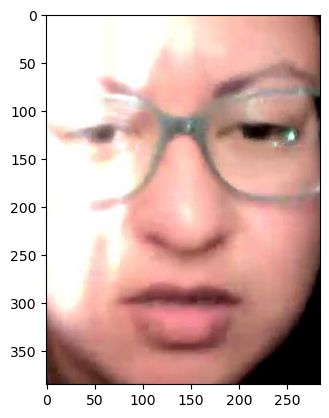

In [16]:
#from retinaface import RetinaFace
from PIL import Image
import matplotlib.pyplot as plt
import os
import gc
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
  
# open method used to open different extension image file
im = Image.open("crop_frames/12192_frame_00023.jpg") 
  
# This method will show image in any image viewer 
plt.imshow(im) 

In [31]:
import os
import cv2

FRAME_PATH = "crop_frames"

# count number of image files in frames directory
total_frames = 0
for file_name in os.listdir(FRAME_PATH):
    if file_name.endswith(".jpg"):
        total_frames += 1

print(f"Total frames: {total_frames}")

#149024#

Total frames: 149024


In [17]:
frames_folder = "frames"
crop_frames_folder = "crop_frames"
frame_names = sorted([filename for filename in os.listdir(frames_folder) if not os.path.exists(os.path.join(crop_frames_folder, filename))])

print(len(frame_names))

11238


In [24]:
video_dict = {}
for i, frames in enumerate(frame_groups):
    video_name = frames[0].split('/')[1].split('_')[0]
    video_dict[video_name] = i
print(video_dict)

{'10698': 0, '10701': 1, '10719': 2, '10730': 3, '10734': 4, '10735': 5, '10750': 6, '10752': 7, '10753': 8, '10762': 9, '10768': 10, '10775': 11, '10782': 12, '10802': 13, '10803': 14, '10804': 15, '10807': 16, '10818': 17, '10824': 18, '10831': 19, '10834': 20, '10837': 21, '10845': 22, '10852': 23, '10855': 24, '10860': 25, '10865': 26, '10870': 27, '10883': 28, '10885': 29, '10890': 30, '10894': 31, '10895': 32, '10898': 33, '10923': 34, '10947': 35, '10950': 36, '10952': 37, '10955': 38, '10959': 39, '10961': 40, '10969': 41, '10994': 42, '10995': 43, '11001': 44, '11005': 45, '11009': 46, '11021': 47, '11022': 48, '11030': 49, '11041': 50, '11043': 51, '11049': 52, '11052': 53, '11069': 54, '11077': 55, '11082': 56, '11085': 57, '11091': 58, '11098': 59, '11108': 60, '11111': 61, '11118': 62, '11122': 63, '11142': 64, '11147': 65, '11161': 66, '11169': 67, '11170': 68, '11175': 69, '11183': 70, '11188': 71, '11191': 72, '11198': 73, '11199': 74, '11202': 75, '11211': 76, '11214':

In [18]:
uncrop_frame_paths = sorted([os.path.join("frames", filename) for filename in frame_names])
print(uncrop_frame_paths)

['frames/24146_frame_00031.jpg', 'frames/24148_frame_00029.jpg', 'frames/24148_frame_00030.jpg', 'frames/24148_frame_00031.jpg', 'frames/24149_frame_00025.jpg', 'frames/24149_frame_00026.jpg', 'frames/24149_frame_00027.jpg', 'frames/24149_frame_00028.jpg', 'frames/24149_frame_00029.jpg', 'frames/24149_frame_00030.jpg', 'frames/24149_frame_00031.jpg', 'frames/24151_frame_00025.jpg', 'frames/24151_frame_00026.jpg', 'frames/24151_frame_00027.jpg', 'frames/24151_frame_00028.jpg', 'frames/24151_frame_00029.jpg', 'frames/24151_frame_00030.jpg', 'frames/24151_frame_00031.jpg', 'frames/24153_frame_00025.jpg', 'frames/24153_frame_00026.jpg', 'frames/24153_frame_00027.jpg', 'frames/24153_frame_00028.jpg', 'frames/24153_frame_00029.jpg', 'frames/24153_frame_00030.jpg', 'frames/24153_frame_00031.jpg', 'frames/24157_frame_00024.jpg', 'frames/24157_frame_00025.jpg', 'frames/24157_frame_00026.jpg', 'frames/24157_frame_00027.jpg', 'frames/24157_frame_00028.jpg', 'frames/24157_frame_00029.jpg', 'frames

In [25]:
uncropped_videos = set([frame_name.split("_")[0] for frame_name in frame_names])
uncrop_video_groups = []

for video_name in uncropped_videos:
    if video_name in video_dict:
        print(f"Uncropped frames found for video {video_name}")
        video_index = video_dict[video_name]
        uncrop_video_groups.append(frame_groups[video_index])



Uncropped frames found for video 24265
Uncropped frames found for video 24334
Uncropped frames found for video 24663
Uncropped frames found for video 24533
Uncropped frames found for video 24650
Uncropped frames found for video 24836
Uncropped frames found for video 24286
Uncropped frames found for video 24985
Uncropped frames found for video 24989
Uncropped frames found for video 24728
Uncropped frames found for video 24547
Uncropped frames found for video 24431
Uncropped frames found for video 24371
Uncropped frames found for video 24146
Uncropped frames found for video 24268
Uncropped frames found for video 25017
Uncropped frames found for video 24855
Uncropped frames found for video 24872
Uncropped frames found for video 24916
Uncropped frames found for video 24178
Uncropped frames found for video 24769
Uncropped frames found for video 24246
Uncropped frames found for video 24163
Uncropped frames found for video 24879
Uncropped frames found for video 24183
Uncropped frames found fo

In [1]:
uncrop_video_groups = sorted(uncrop_video_groups)


NameError: name 'uncrop_video_groups' is not defined

In [28]:
extract_faces(uncrop_video_groups)

  1%|▏         | 5/367 [02:13<1:39:11, 16.44s/it]  

No face detected in frame: frames/24246_frame_00026.jpg


  9%|▉         | 33/367 [04:08<29:28,  5.29s/it] 

frames/24246_frame_00026.jpg has been cropped


 26%|██▌       | 94/367 [06:28<04:11,  1.09it/s]  

No face detected in frame: frames/24454_frame_00007.jpg
No face detected in frame: frames/24454_frame_00008.jpg
No face detected in frame: frames/24454_frame_00009.jpg
No face detected in frame: frames/24454_frame_00010.jpg
No face detected in frame: frames/24454_frame_00011.jpg
No face detected in frame: frames/24454_frame_00012.jpg
No face detected in frame: frames/24454_frame_00017.jpg
No face detected in frame: frames/24454_frame_00018.jpg
No face detected in frame: frames/24454_frame_00019.jpg
No face detected in frame: frames/24454_frame_00020.jpg
No face detected in frame: frames/24454_frame_00021.jpg
No face detected in frame: frames/24454_frame_00022.jpg
No face detected in frame: frames/24454_frame_00023.jpg
No face detected in frame: frames/24454_frame_00024.jpg
No face detected in frame: frames/24454_frame_00025.jpg
frames/24454_frame_00007.jpg has been cropped
frames/24454_frame_00008.jpg has been cropped
frames/24454_frame_00009.jpg has been cropped
frames/24454_frame_000

 35%|███▍      | 128/367 [08:36<02:39,  1.49it/s]

No face detected in frame: frames/24462_frame_00025.jpg
frames/24462_frame_00025.jpg has been cropped


 96%|█████████▌| 351/367 [23:29<00:08,  1.97it/s]  

No face detected in frame: frames/25049_frame_00027.jpg


 96%|█████████▋| 354/367 [24:16<01:13,  5.62s/it]

frames/25049_frame_00027.jpg has been cropped


100%|██████████| 367/367 [24:19<00:00,  3.98s/it]


In [32]:
import os
import numpy as np
import cv2
from multiprocessing import Pool
import tqdm

CROP_FRAME_PATH = "crop_frames"
VIDEO_COUNT = len(os.listdir(CROP_FRAME_PATH)) // 32

def load_and_process_image(frame_path):
    img = cv2.imread(frame_path)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    img = img[..., ::-1]  # Convert BGR to RGB
    return img

def process_video_chunk(args):
    index, chunk = args
    video_data = []
    for frame in chunk:
        frame_path = os.path.join(CROP_FRAME_PATH, frame)
        img = load_and_process_image(frame_path)
        video_data.append(img)
    return index, video_data

def build_dataset():
    dataset = [None] * VIDEO_COUNT
    all_frames = sorted(os.listdir(CROP_FRAME_PATH))
    
    with Pool() as pool:
        chunks = [(i, all_frames[i*32:(i+1)*32]) for i in range(VIDEO_COUNT)]
        for index, chunk_data in tqdm.tqdm(pool.imap_unordered(process_video_chunk, chunks), total=VIDEO_COUNT):
            dataset[index] = chunk_data
    
    return np.array(dataset)

val_dataset = build_dataset()
print(val_dataset.shape)




100%|██████████| 4657/4657 [00:44<00:00, 103.83it/s]


(4657, 32, 224, 224, 3)


In [6]:
import numpy as np

size_in_bytes = val_dataset.nbytes
size_in_gb = size_in_bytes / (1024 ** 3)

print("Size of test_dataset in GB: {:.2f} GB".format(size_in_gb))

Size of test_dataset in GB: 20.89 GB


In [35]:
np.save("val_dataset.npy", val_dataset)

In [7]:
val_dataset.dtype

dtype('uint8')

In [5]:
import numpy as np

val_dataset = np.load('val_dataset.npy')
print(val_dataset.shape)

(4657, 32, 224, 224, 3)


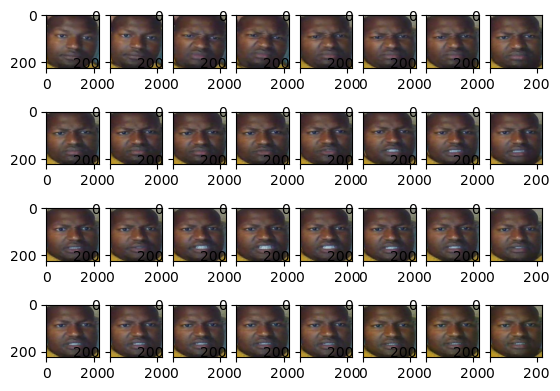

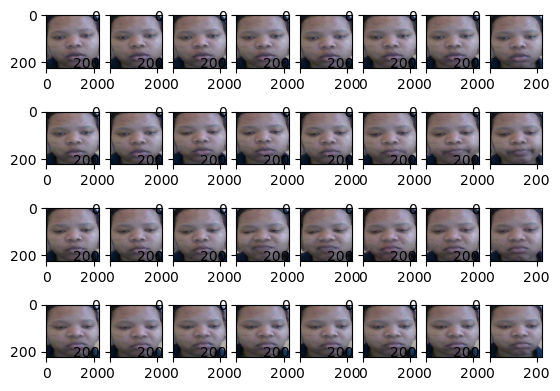

In [8]:
import matplotlib.pyplot as plt

# Display images from the first chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(val_dataset[0, i])
plt.show()

# Display images from the second chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(val_dataset[1, i])
plt.show()



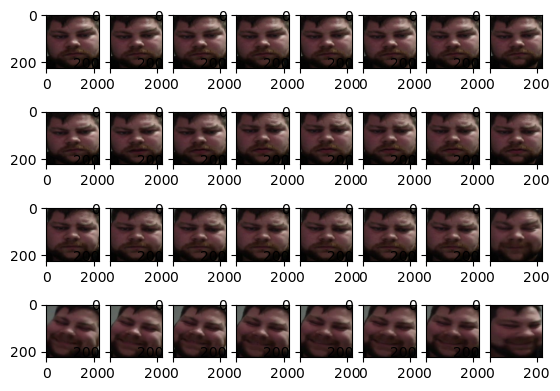

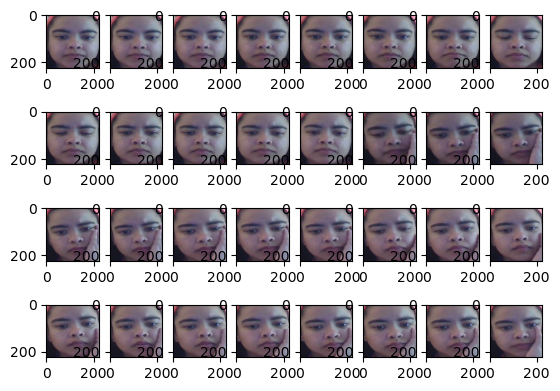

In [9]:
import matplotlib.pyplot as plt

# Display images from the first chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(val_dataset[10, i])
plt.show()

# Display images from the second chunk
fig, axs = plt.subplots(4, 8)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(val_dataset[4656, i])
plt.show()